# Import RamanSpectraAnalyzer

In [23]:
from RamanSpectraAnalyzer import *

# Preparing the data
You can generate or import your own data. If you have your own data you need to parse it into dataframe or list of dataframes. Each dataframe shold contain two colums: Intensity and Wavenumber.

## Generating data

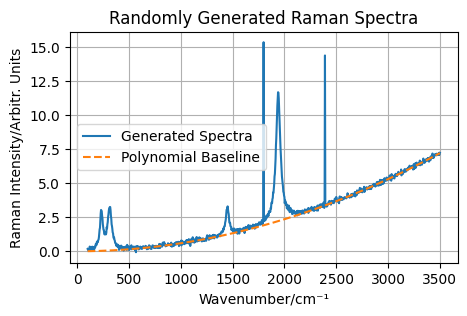

In [31]:
# Generating Random Raman Spectra
# This cell demonstrates how to generate random Raman spectra.
# Adjust parameters as needed to see different effects.
random_spectra = generate_random_raman_spectra(n_points=1000, n_peaks=5, noise_level=0.1, 
                                               peak_amplitude_range=(1, 10), peak_width_range=(10, 50),
                                               baseline_degree=2, baseline_scale=0.000001, n_spectra=1,
                                               spike_prob=0.001, plot=True)

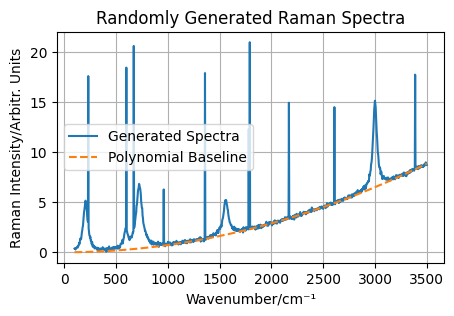

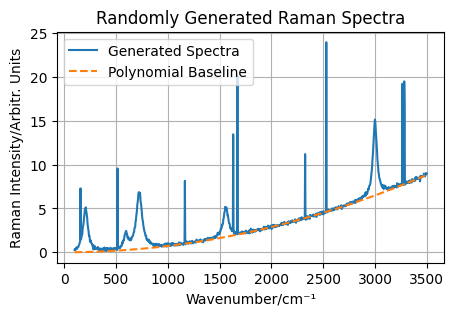

In [37]:
# Generate multiple random Raman spectra
random_spectra_list = generate_random_raman_spectra(n_points=1000, n_peaks=5, noise_level=0.1, 
                                                    peak_amplitude_range=(1, 10), peak_width_range=(10, 50),
                                                    baseline_degree=2, baseline_scale=0.000001, n_spectra=2,
                                                    spike_prob=0.01, plot=True)

# Data Pre-Processing
## Cut Raman Spectra

In [38]:
# Cut Raman spectra
raman_spectra_cut = cut_spectra(random_spectra[0], 200, 3000)

# Cun Raman spectra list
raman_spectra_cut_list = []
for raman_spectra in random_spectra_list:
    raman_spectra_cut_list.append(cut_spectra(raman_spectra, 200, 3000))

## Despike Raman Spectra

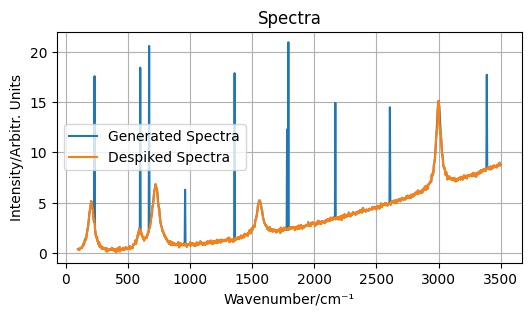

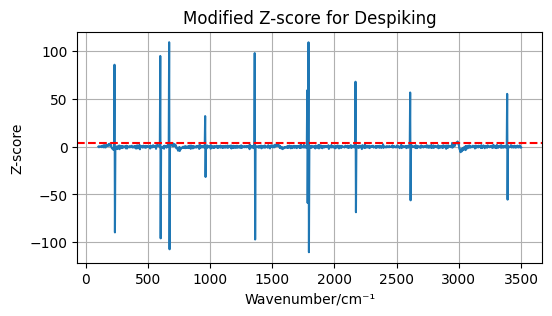

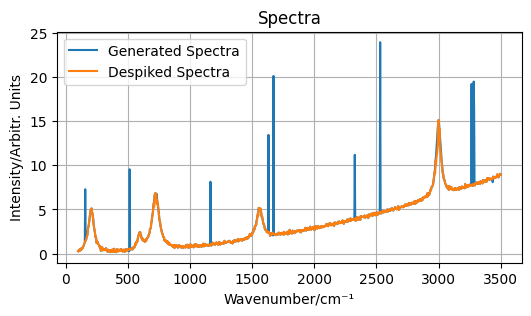

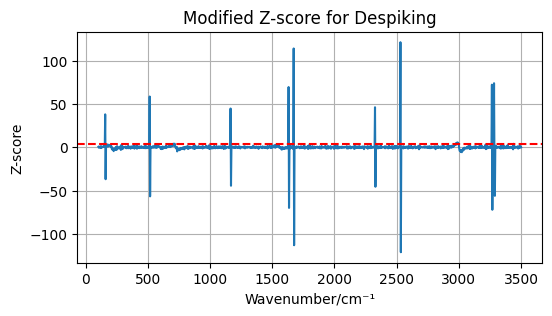

In [39]:
# Despike Raman spectra
raman_spectra_despiked_list = []
for raman_spectra in random_spectra_list:
    raman_spectra_despiked_list.append(despike_spectra(raman_spectra, threshold=3.5, moving_average=8, plot=True))

## Averaging Spectum
If you did same experiment several times you can average spectra to improve statistics, reduce noise. It is important to do this step only after peaks are removed.

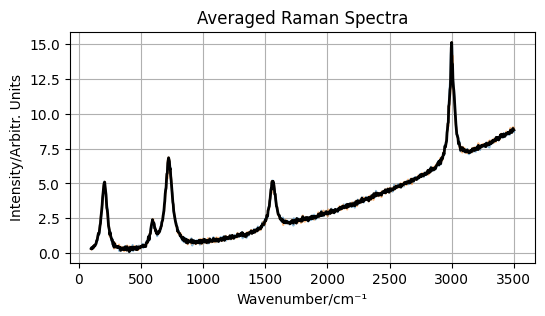

In [40]:
# Average Raman spectra to improve statistics
raman_spectra_averaged = average_spectra(raman_spectra_despiked_list, plot=True)

## Baseline estimation and separation

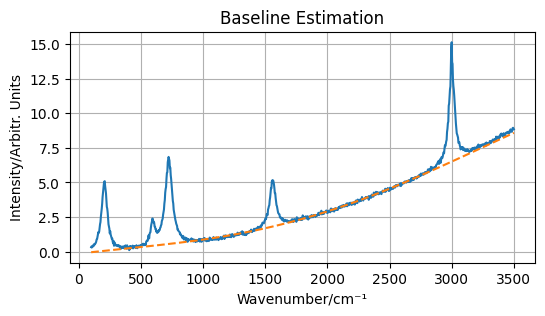

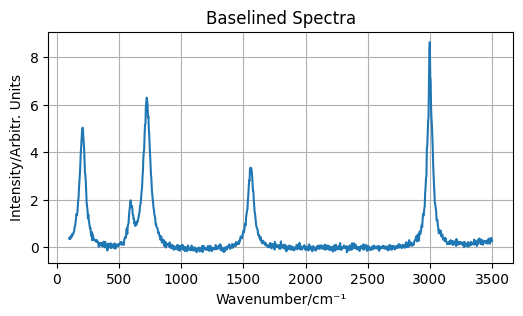

In [41]:
# Remove baseline from Raman spectra
raman_spectra_no_baseline = estimate_baseline(raman_spectra_averaged,lam=100000000, p=0.005, niter=3, plot=True)

## Shifting Raman Spectra Intensity to positive values

In [42]:
# Shift to zero intensity
raman_spectra_shifted = shift_intensity_to_zero(raman_spectra_no_baseline)

## Smoothing Raman Spectra

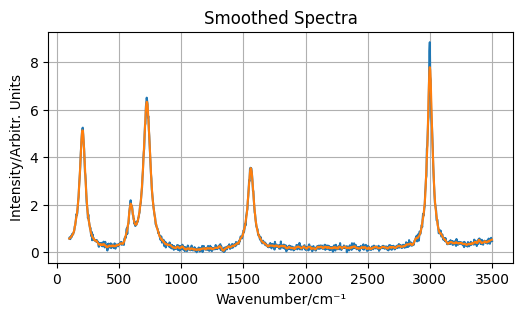

In [43]:
# Smooth Raman spectra
raman_spectra_smoothed = smooth_spectra(raman_spectra_shifted, plot=True)

# Raman Spectra Analysis
After you prepared the data you can try to find peaks and fit them. Quality of fit depends of a lot of factors. To get best fit try to play with different function inputs. Also you always can add peaks manually or remove them to improve your fit.

/Users/mykytakizilov/projects/graduate_school/Raman_analyzer/RamanSpectraAnalyzer.py:402: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(xs, fit, 'r-', label='Fitted Spectra', color='red', lw=2, ls='--', alpha=0.6)
/Users/mykytakizilov/projects/graduate_school/Raman_analyzer/RamanSpectraAnalyzer.py:402: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax1.plot(xs, fit, 'r-', label='Fitted Spectra', color='red', lw=2, ls='--', alpha=0.6)


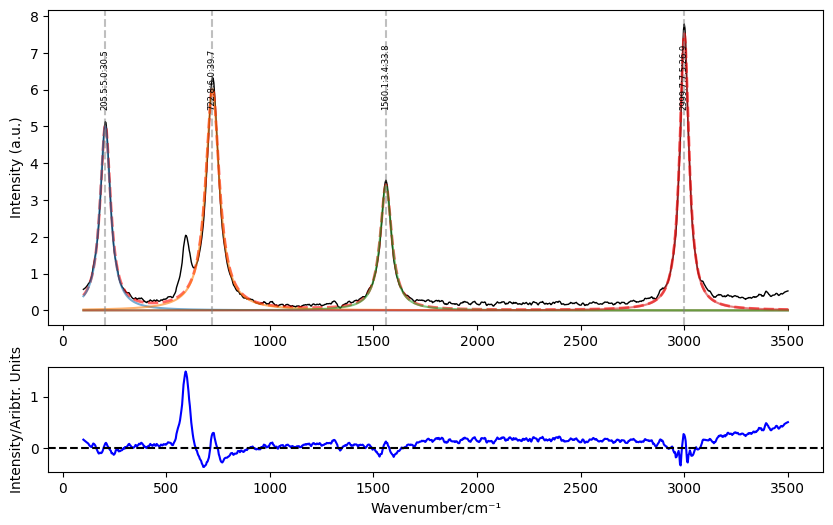

In [44]:
# Fit Lorentzian peaks to Raman spectra
raman_spectra_fitted = fit_lorentzians(raman_spectra_smoothed, n_peaks_to_find=4, title='', threshold=0.25, min_dist=7, peak_method='scipy', reduce_data_points_factor=None, fixed_centers=False, remove_peaks_ranges=None, add_peaks=None)